#Modelo determinista

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


#*E.coli*

In [3]:
#First,we define the value of h,the corresponding range in x and the constants
#If you need more information about the parameters of our model please visit our Wiki. 
h=0.200 #step value
aL = 20.0     #Producción basal de EAi
bL = 400.0     #Maxima rata de expresión de pLac ---->varia entre 100 y 400
kL = 3000.0   #La mitad de la rata de expresión máxima de pLac
nL = 2.0      #Coeficiente de Hill de pLac
gEA = 0.033  #Constante de degradación de EAi
aPr = 20.0    #Producción basal de MER
bPr = 580.0   #Maxima rata de expresión de pR #caculado a partir de real
kPr = 5800.0  #La mitad del valor máximo de expresión de pR # real 
nPr = 2.0     #Coeficiente de hill de pR
gMER = 0.033  #Constante de degradación de MER
bHg = 0.005 #Coeficiente de acople de mercurio a MER #Del estocástico
bHgMER = 0.00001406334639 #Coeficiente de acople de HgMER a MER, para crear el dímero HgMER2 #estimado por orden de magnitud
dHgMERd =60/(51*15)  #Coeficiente de desacoplamiento del dímero HgMER2 #REAL 
dHgMER = 60/(47*15)      #Coeficiente de desacoplamiento del compuesto HgMER
gHgMER = 0.033  #Constante de degradación de HgMER
gHgMERd = 1/51  #Constante de degradación de HgMER2 --------------
aPt = 20.0    #Produccion basal del promotor pt
bPt = 580.0   #Maxima rata de expresión de pT
kPt = 5800.0  #La mitad de la rata de expresión máxima de pT
nPt = 2.0     #Coeficiente de Hill de pT
gLI = 0.0231   #Constante de degradación de LI
gXI = 0.033   #Constante de degradación de XI 
gEAI=0.00071666667
n_points = int((400.0+h)/h)
t = zeros(n_points,dtype=np.float64)
EA = zeros(n_points,dtype=np.float64)
MER=zeros(n_points,dtype=np.float64) #mer dimer  
HgMER= zeros(n_points,dtype=np.float64) #mer+hg
HgMERd= zeros(n_points,dtype=np.float64) #2mer+hg
XI = zeros(n_points,dtype=np.float64)
LI= zeros(n_points,dtype=np.float64) 
Hg= zeros(n_points,dtype=np.float64) 
#A no cambia

In [4]:
#we define all the functions 

def func_EA_prime(t,EA,MER,HgMER,HgMERd,XI,LI,Hg):
    return aL + (bL*pow(kL,nL))/(pow(kL,nL)+(pow(LI,nPr)*pow(kL,nL)))- gEA*EA

def func_MER_prime(t,EA,MER,HgMER,HgMERd,XI,LI,Hg):
    return aPr + bPr/(1+(pow(MER,nPr)/pow(kPr,nPr))) - gMER*MER - bHg*Hg*MER  + dHgMER*HgMER + dHgMERd*HgMERd 

def func_HgMER_prime(t,EA,MER,HgMER,HgMERd,XI,LI,Hg):
    return dHgMERd*HgMERd  + bHg*Hg*MER - dHgMER*HgMER - gHgMER*HgMER - bHgMER*MER*HgMER 


def func_HgMERd_prime(t,EA,MER,HgMER,HgMERd,XI,LI,Hg):
    return bHgMER*MER*HgMER - dHgMERd*HgMERd - gHgMERd*HgMERd



def func_XI_prime(t,EA,MER,HgMER,HgMERd,XI,LI,Hg):
    return aPt + bPt/(1+(pow(kPt,nPt)/pow(HgMERd,nPt))) - gXI*XI#-gEAI*XI*EA

def func_LI_prime(t,EA,MER,HgMER,HgMERd,XI,LI,Hg):
    return aPt + bPt/(1+(pow(kPt,nPt)/pow(HgMERd,nPt))) - gLI*LI




In [5]:
#First we initialize the arrays

t[0] = 0.0
Hg[0]=0.0
EA[0] = 0.0
MER[0] = 0.0
HgMER[0] = 0.0
XI[0]=0.0
LI[0]=0.0
print "hola"
HgMERd[0] = 0.0


#then we determine the input function
#for i in range(400):
#    Hg[i]=0.0
#for i in range(0,n_points):
    #Hg[i]=50000*e**(-(t[i]-80)**2/2*100)
    #Hg[i]=sin(t[i]/10) 
    #Hg[i]=20
    

               
#And finally we do 4th order Runge Kutta. 
for i in range(1,n_points):
    
    k1_EA = func_EA_prime(t[i-1],EA[i-1],MER[i-1],HgMER[i-1],HgMERd[i-1],XI[i-1],LI[i-1],Hg[i-1])
    k1_MER = func_MER_prime(t[i-1],EA[i-1],MER[i-1],HgMER[i-1],HgMERd[i-1],XI[i-1],LI[i-1],Hg[i-1])
    k1_HgMER = func_HgMER_prime(t[i-1],EA[i-1],MER[i-1],HgMER[i-1],HgMERd[i-1],XI[i-1],LI[i-1],Hg[i-1])
    k1_HgMERd = func_HgMERd_prime(t[i-1],EA[i-1],MER[i-1],HgMER[i-1],HgMERd[i-1],XI[i-1],LI[i-1],Hg[i-1])
    k1_XI = func_XI_prime(t[i-1],EA[i-1],MER[i-1],HgMER[i-1],HgMERd[i-1],XI[i-1],LI[i-1],Hg[i-1])
    k1_LI = func_LI_prime(t[i-1],EA[i-1],MER[i-1],HgMER[i-1],HgMERd[i-1],XI[i-1],LI[i-1],Hg[i-1])
      
 
    
    #first step
    t1 = t[i-1] + (h/2.0)
    EA1 = EA[i-1] + (h/2.0) * k1_EA
    MER1 = MER[i-1] + (h/2.0) * k1_MER
    HgMER1 = HgMER[i-1] + (h/2.0) * k1_HgMER
    HgMERd1 = HgMERd[i-1] + (h/2.0) * k1_HgMERd
    XI1 = XI[i-1] + (h/2.0) * k1_XI
    LI1 = LI[i-1] + (h/2.0) * k1_LI
   

    k2_EA = func_EA_prime(t1,EA1,MER1,HgMER1,HgMERd1,XI1,LI1,Hg[i-1])
    k2_MER = func_MER_prime(t1,EA1,MER1,HgMER1,HgMERd1,XI1,LI1,Hg[i-1])
    k2_HgMER = func_HgMER_prime(t1,EA1,MER1,HgMER1,HgMERd1,XI1,LI1,Hg[i-1])
    k2_HgMERd = func_HgMERd_prime(t1,EA1,MER1,HgMER1,HgMERd1,XI1,LI1,Hg[i-1])
    k2_XI = func_XI_prime(t1,EA1,MER1,HgMER1,HgMERd1,XI1,LI1,Hg[i-1])
    k2_LI = func_LI_prime(t1,EA1,MER1,HgMER1,HgMERd1,XI1,LI1,Hg[i-1])
  
    
    
    #second step
    t2 = t[i-1] + (h/2.0)
    EA2 = EA[i-1] + (h/2.0) * k2_EA
    MER2 = MER[i-1] + (h/2.0) * k2_MER
    HgMER2 = HgMER[i-1] + (h/2.0) * k2_HgMER
    HgMERd2 = HgMERd[i-1] + (h/2.0) * k2_HgMERd
    XI2 = XI[i-1] + (h/2.0) * k2_XI
    LI2 = LI[i-1] + (h/2.0) * k2_LI
    
    
    k3_EA = func_EA_prime(t2,EA2,MER2,HgMER2,HgMERd2,XI2,LI2,Hg[i-1])
    k3_MER = func_MER_prime(t2,EA2,MER2,HgMER2,HgMERd2,XI2,LI2,Hg[i-1])
    k3_HgMER = func_HgMER_prime(t2,EA2,MER2,HgMER2,HgMERd2,XI2,LI2,Hg[i-1])
    k3_HgMERd = func_HgMERd_prime(t2,EA2,MER2,HgMER2,HgMERd2,XI2,LI2,Hg[i-1])
    k3_XI = func_XI_prime(t2,EA2,MER2,HgMER2,HgMERd2,XI2,LI2,Hg[i-1])
    k3_LI = func_LI_prime(t2,EA2,MER2,HgMER2,HgMERd2,XI2,LI2,Hg[i-1])
    
    #third step
    t3 = t[i-1] + (h/2.0)
    EA3 = EA[i-1] + (h/2.0) * k3_EA
    MER3 = MER[i-1] + (h/2.0) * k3_MER
    HgMER3 = HgMER[i-1] + (h/2.0) * k3_HgMER
    HgMERd3 = HgMERd[i-1] + (h/2.0) * k3_HgMERd
    XI3 = XI[i-1] + (h/2.0) * k3_XI
    LI3 = LI[i-1] + (h/2.0) * k3_LI
     
    k4_EA = func_EA_prime(t3,EA3,MER3,HgMER3,HgMERd3,XI3,LI3,Hg[i-1])
    k4_MER = func_MER_prime(t3,EA3,MER3,HgMER3,HgMERd3,XI3,LI3,Hg[i-1])
    k4_HgMER = func_HgMER_prime(t3,EA3,MER3,HgMER3,HgMERd3,XI3,LI3,Hg[i-1])
    k4_HgMERd = func_HgMERd_prime(t3,EA3,MER3,HgMER3,HgMERd3,XI3,LI3,Hg[i-1])
    k4_XI = func_XI_prime(t3,EA3,MER3,HgMER3,HgMERd3,XI3,LI3,Hg[i-1])
    k4_LI = func_LI_prime(t3,EA3,MER3,HgMER3,HgMERd3,XI3,LI3,Hg[i-1])
    
    
     #fourth step
    average_k_EA = (1.0/6.0)*(k1_EA + 2.0*k2_EA + 2.0*k3_EA + k4_EA)
    average_k_MER = (1.0/6.0)*(k1_MER + 2.0*k2_MER + 2.0*k3_MER + k4_MER)
    average_k_HgMER = (1.0/6.0)*(k1_HgMER + 2.0*k2_HgMER + 2.0*k3_HgMER + k4_HgMER)
    average_k_HgMERd = (1.0/6.0)*(k1_HgMERd + 2.0*k2_HgMERd + 2.0*k3_HgMERd + k4_HgMERd)
    average_k_XI = (1.0/6.0)*(k1_XI + 2.0*k2_XI + 2.0*k3_XI + k4_XI)
    average_k_LI = (1.0/6.0)*(k1_LI + 2.0*k2_LI + 2.0*k3_LI + k4_LI)
   
    
    t[i] = t[i-1] + h
    EA[i] = EA[i-1] + h * average_k_EA
    MER[i] = MER[i-1] + h * average_k_MER
    HgMER[i] = HgMER[i-1] + h * average_k_HgMER
    HgMERd[i] = HgMERd[i-1] + h * average_k_HgMERd
    XI[i] = XI[i-1] + h * average_k_XI
    LI[i] = LI[i-1] + h * average_k_LI
    
    
    #if (i < 400):
    #    Hg[i]=0.0
    #if (401<i<n_points):
    #    Hg[i]=5000*sin(t[i]/100)+5000
    for i in range(0,n_points):
        Hg[i]=7000*e**(-(t[i]-80)**2/2*2)
        #Hg[i]=20
        #Hg[i]=50*e**(-(t[i]-15)**2/2*100)
print(XI)
    

/home/paula/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:19: RuntimeWarning: divide by zero encountered in double_scalars
/home/paula/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:22: RuntimeWarning: divide by zero encountered in double_scalars
/home/paula/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:19: RuntimeWarning: overflow encountered in double_scalars


hola
[  0.00000000e+00   3.98902176e+00   7.95178823e+00 ...,   1.81813522e+04
   1.81813553e+04   1.81813583e+04]


/home/paula/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:22: RuntimeWarning: overflow encountered in double_scalars


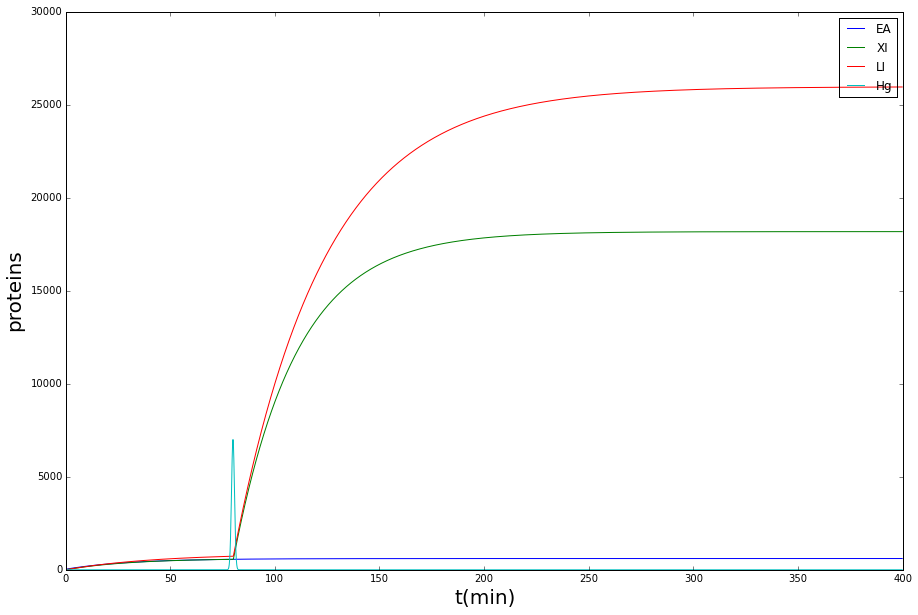

In [7]:
#Plot

plot(t,EA,label='EA')
#plot(t,MER,label='MER')
#plot(t,HgMER,label='HgMER')
#plot(t,HgMERd,label='HgMER2')
plot(t,XI,label='XI')
plot(t,LI,label='LI')
plot(t,Hg,label='Hg')
plt.xlabel('t(min)',size=20)
plt.ylabel('proteins',size=20)

legend()
figure(figsize(15,10))
plt.savefig("MercuryEcoli.png", format='png',bbox_inches='tight',transparent=False)
numpy.savetxt('inputShew.txt', XI)

#Shewanella 
Se usó el output de *E.coli*  como input en *Shewanella odeinensis* 

In [13]:
IN=numpy.loadtxt("inputShew.txt")
#First,we define the value of h,the corresponding range in x and the constants
#If you need more information about the parameters of our model please visit our Wiki. 
h=0.200 #step value
a=90.000   #important, adjusted value 
bXR=100.000 #No va 
kXR=5000.00 #typical value 
gXR=0.060 #real, checked 
dXRa=0.1998 #real, important not checked 
aX=0.004691138 #real, basal checked, important
bX=300.000 #typical value 
kc=0.00001406334639 #real, important 
nX=1.000 #Assumed ...why?
kx=1409.148 #not important 
gCY=0.0007+0.01 #important checked, strange value  
kXRa=3000.000 #esto no va 
gXRa=0.0231 #not important not checked  



n_points = int((600.0+h)/h)
t = zeros(n_points)
XR = zeros(n_points)
CY = zeros(n_points) 
A = zeros(n_points)
XRa = zeros(n_points)
print n_points

3001


In [16]:
#we define all the functions 
def func_XRa_prime(t,XRa,CY,XR,A):
    return kc*XR*A-(gXRa*XRa)-(dXRa*XRa)

def func_XR_prime(t,XRa,CY,XR,A):
    return a-(kc*A*XR)-(gXR*XR)+(dXRa*XRa)

def func_CY_prime(t,XRa,CY,XR,A):
    return aX+(bX*pow(XRa,nX))/(pow(kXR,nX)+pow(XRa,nX))-(gCY*CY)


In [17]:
#First we initialize the arrays
t[0] = 0.0
XRa[0] = 0.0
XR[0] = 0.0
CY[0] = 0.0
A[0] = 0.0
#then we determine the input function
for i in range(1500):
    A[i]=IN[i]
for i in range(1501,n_points):
    A[i]=0
    
    
#And finally we do 4th order Runge Kutta. 
for i in range(1,n_points):
    
    k1_XRa = func_XRa_prime(t[i-1],XRa[i-1],CY[i-1],XR[i-1],A[i-1])
    k1_CY = func_CY_prime(t[i-1],XRa[i-1],CY[i-1],XR[i-1],A[i-1])
    k1_XR = func_XR_prime(t[i-1],XRa[i-1],CY[i-1],XR[i-1],A[i-1])
    
    #first step
    t1 = t[i-1] + (h/2.0)
    XRa1 = XRa[i-1] + (h/2.0) * k1_XRa
    CY1 = CY[i-1] + (h/2.0) * k1_CY
    XR1 = XR[i-1] + (h/2.0) * k1_XR

    k2_XRa = func_XRa_prime(t1,XRa1,CY1,XR1,A[i-1])
    k2_CY = func_CY_prime(t1,XRa1,CY1,XR1,A[i-1])
    k2_XR = func_XR_prime(t1,XRa1,CY1,XR1,A[i-1])
    
    
    #second step
    t2 = t[i-1] + (h/2.0)
    XRa2 = XRa[i-1] + (h/2.0) * k2_XRa
    CY2 = CY[i-1] + (h/2.0) * k2_CY
    XR2 = XR[i-1] + (h/2.0) * k2_XR
     
    k3_XRa = func_XRa_prime(t2,XRa2,CY2,XR2,A[i-1])
    k3_CY = func_CY_prime(t2,XRa2,CY2,XR2,A[i-1])
    k3_XR = func_XR_prime(t2,XRa2,CY2,XR2,A[i-1])
    
    
    #third step
    t3 = t[i-1] + h
    XRa3 = XRa[i-1] + (h/2.0) * k3_XRa
    CY3 = CY[i-1] + (h/2.0) * k3_CY
    XR3 = XR[i-1] + (h/2.0) * k3_XR
    
    k4_XRa = func_XRa_prime(t3,XRa3,CY3,XR3,A[i-1])
    k4_CY = func_CY_prime(t3,XRa3,CY3,XR3,A[i-1])
    k4_XR = func_XR_prime(t3,XRa3,CY3,XR3,A[i-1])
    
    
     #fourth step
    average_k_XRa = (1.0/6.0)*(k1_XRa + 2.0*k2_XRa + 2.0*k3_XRa + k4_XRa)
    average_k_CY = (1.0/6.0)*(k1_CY + 2.0*k2_CY + 2.0*k3_CY + k4_CY)
    average_k_XR = (1.0/6.0)*(k1_XR + 2.0*k2_XR + 2.0*k3_XR + k4_XR)

    t[i] = t[i-1] + h
    XRa[i] = XRa[i-1] + h * average_k_XRa
    CY[i] = CY[i-1] + h * average_k_CY
    XR[i] = XR[i-1] + h * average_k_XR
    
    if (i < 1500):
        A[i]=IN[i]
    if (1501<i<n_points):
        A[i]=0 
    
   

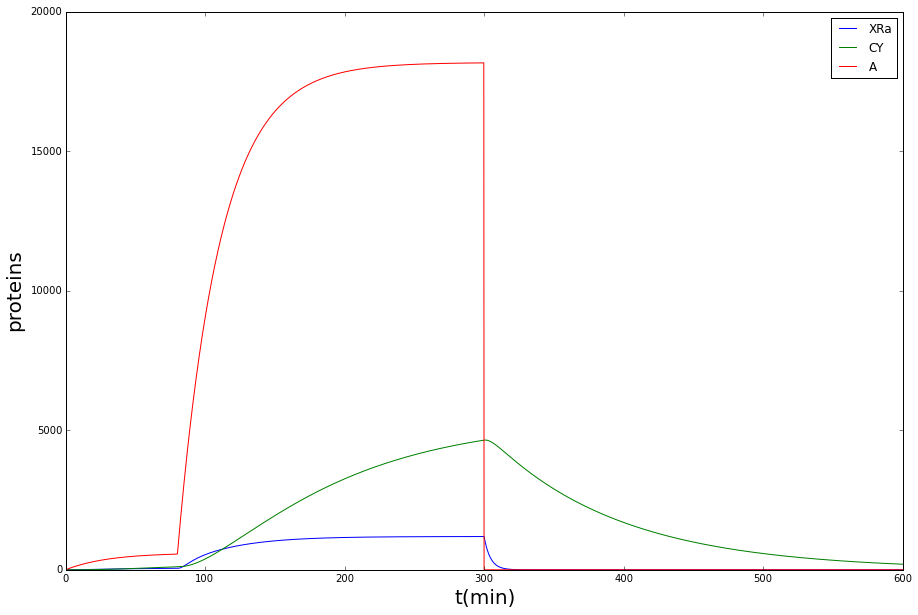

In [18]:
#Plot

plot(t,XRa,label='XRa')
plot(t,CY,label='CY')
#plot(t,XR,label='XR')
plot(t,A,label='A')
plt.xlabel('t(min)',size=20)
plt.ylabel('proteins',size=20)
legend()
figure(figsize(15,10))
plt.savefig("2014.jpg", format='jpg',bbox_inches='tight',transparent=False)

#Otros ejemplos
Utilizamos el output de otro proyecto hecho para iGEM en el 2014 para ver cómo reaccionaría *S.odeinensis* como detector de cólera. 

In [19]:
IN=numpy.loadtxt("Input2014.txt")

In [20]:
#First,we define the value of h,the corresponding range in x and the constants
#If you need more information about the parameters of our model please visit our Wiki. 
h=0.200 #step value
a=90.000   #important, adjusted value 
bXR=300.000 #No va 
kXR=3000.000 #typical value 
gXR=0.060 #real, checked 
dXRa=0.1998 #real, important not checked 
aX=0.004691138 #real, basal checked, important
bX=300.000 #typical value 
kc=0.000001406334639 #real, important 
nX=1.000 #Assumed ...why?
kx=1409.148 #not important 
gCY=0.00071666667 #important checked, strange value  
kXRa=3000.000 #esto no va 
gXRa=0.0231 #not important not checked  


n_points = int((7000.0+h)/h)
t = zeros(n_points)
XR = zeros(n_points)
CY = zeros(n_points) 
A = zeros(n_points)
XRa = zeros(n_points)
#A no cambia 
print n_points

35001


In [21]:
#we define all the functions 
def func_XRa_prime(t,XRa,CY,XR,A):
    return kc*XR*A-(gXRa*XRa)-(dXRa*XRa)

def func_XR_prime(t,XRa,CY,XR,A):
    return a-(kc*A*kXR)-(gXR*XR)+(dXRa*XRa)

def func_CY_prime(t,XRa,CY,XR,A):
    return aX+(kc*A*XR)-(gCY*CY)



In [22]:
#First we initialize the arrays
t[0] = 0.0
XRa[0] = 0.0
XR[0] = 0.0
CY[0] = 0.0
A[0] = 0.0
#then we determine the input function
for i in range(19800):
    A[i]=IN[i]
for i in range(19801,n_points):
    A[i]=0

    
#And finally we do 4th order Runge Kutta. 
for i in range(1,n_points):
    
    k1_XRa = func_XRa_prime(t[i-1],XRa[i-1],CY[i-1],XR[i-1],A[i-1])
    k1_CY = func_CY_prime(t[i-1],XRa[i-1],CY[i-1],XR[i-1],A[i-1])
    k1_XR = func_XR_prime(t[i-1],XRa[i-1],CY[i-1],XR[i-1],A[i-1])
    
    #first step
    t1 = t[i-1] + (h/2.0)
    XRa1 = XRa[i-1] + (h/2.0) * k1_XRa
    CY1 = CY[i-1] + (h/2.0) * k1_CY
    XR1 = XR[i-1] + (h/2.0) * k1_XR

    k2_XRa = func_XRa_prime(t1,XRa1,CY1,XR1,A[i-1])
    k2_CY = func_CY_prime(t1,XRa1,CY1,XR1,A[i-1])
    k2_XR = func_XR_prime(t1,XRa1,CY1,XR1,A[i-1])
    
    
    #second step
    t2 = t[i-1] + (h/2.0)
    XRa2 = XRa[i-1] + (h/2.0) * k2_XRa
    CY2 = CY[i-1] + (h/2.0) * k2_CY
    XR2 = XR[i-1] + (h/2.0) * k2_XR
     
    k3_XRa = func_XRa_prime(t2,XRa2,CY2,XR2,A[i-1])
    k3_CY = func_CY_prime(t2,XRa2,CY2,XR2,A[i-1])
    k3_XR = func_XR_prime(t2,XRa2,CY2,XR2,A[i-1])
    
    
    #third step
    t3 = t[i-1] + h
    XRa3 = XRa[i-1] + (h/2.0) * k3_XRa
    CY3 = CY[i-1] + (h/2.0) * k3_CY
    XR3 = XR[i-1] + (h/2.0) * k3_XR
    
    k4_XRa = func_XRa_prime(t3,XRa3,CY3,XR3,A[i-1])
    k4_CY = func_CY_prime(t3,XRa3,CY3,XR3,A[i-1])
    k4_XR = func_XR_prime(t3,XRa3,CY3,XR3,A[i-1])
    
    
     #fourth step
    average_k_XRa = (1.0/6.0)*(k1_XRa + 2.0*k2_XRa + 2.0*k3_XRa + k4_XRa)
    average_k_CY = (1.0/6.0)*(k1_CY + 2.0*k2_CY + 2.0*k3_CY + k4_CY)
    average_k_XR = (1.0/6.0)*(k1_XR + 2.0*k2_XR + 2.0*k3_XR + k4_XR)

    t[i] = t[i-1] + h
    XRa[i] = XRa[i-1] + h * average_k_XRa
    CY[i] = CY[i-1] + h * average_k_CY
    XR[i] = XR[i-1] + h * average_k_XR
    
    #if (i < 400):
    #    A[i]=0.0
    #if (401<i<n_points):
    #    A[i]=5000*sin(t[i]/100)+5000
  

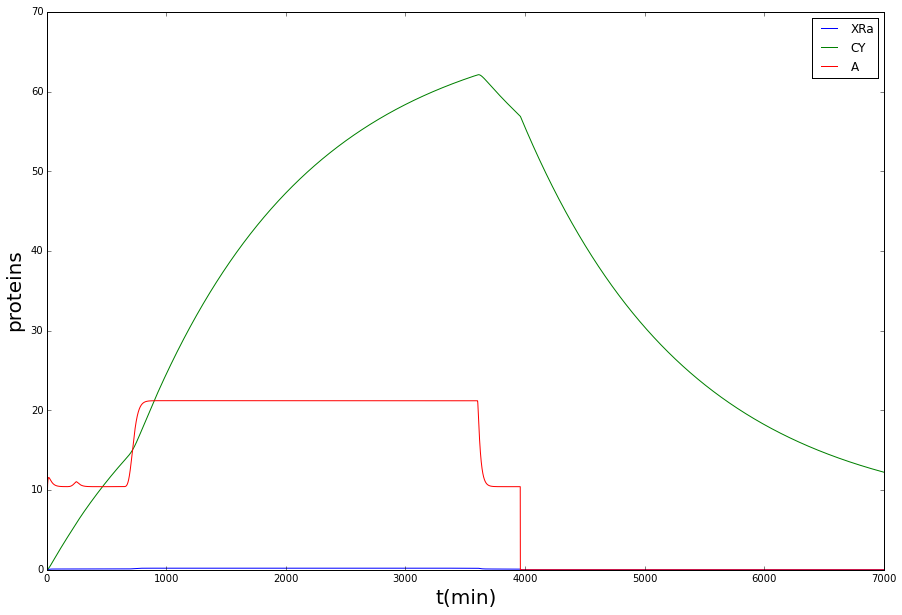

In [23]:
#Plot

plot(t,XRa,label='XRa')
plot(t,CY,label='CY')
#plot(t,XR,label='XR')
plot(t,A,label='A')
plt.xlabel('t(min)',size=20)
plt.ylabel('proteins',size=20)
legend()
figure(figsize(15,10))
plt.savefig("2014.jpg", format='jpg',bbox_inches='tight',transparent=False)